In [93]:
import numpy as np
import pandas as pd

#membaca dataset
dataset = pd.read_csv("Dataset alpha 0.2.csv")
dataset.head(100)

,ID,Items,Probability_Value,Potential_Criminal_Usage,Weight
0,1,Citrus_Fruits,1,Remove_Evidence,1.0
1,2,Bleach,2,Remove_Evidence,1.0
2,3,UV_Light,3,Remove_Evidence,0.2
3,4,Alcohol,3,Remove_Evidence,2.0
4,5,Plastic_Bag,2,Remove_Evidence,5.0
5,6,Lye,3,Remove_Evidence,5.0
6,7,Reciprocating_Saw,3,Remove_Evidence,2.5
7,8,Shovel,3,Remove_Evidence,2.0
8,9,Tarp,3,Remove_Evidence,3.0
9,10,Zip_Ties,4,Kidnap,1.0


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        35 non-null     int64  
 1   Items                     35 non-null     object 
 2   Probability_Value         35 non-null     int64  
 3   Potential_Criminal_Usage  35 non-null     object 
 4   Weight                    35 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [95]:
label_mapping = dict(zip(dataset.Probability_Value.unique(),dataset.Items.unique()))
label_mapping

{1: 'Citrus_Fruits',
 2: 'Bleach',
 3: 'UV_Light',
 4: 'Alcohol',
 5: 'Plastic_Bag',
 7: 'Lye',
 6: 'Reciprocating_Saw',
 8: 'Shovel',
 9: 'Tarp',
 12: 'Zip_Ties',
 10: 'Rope',
 11: 'Chlorox'}

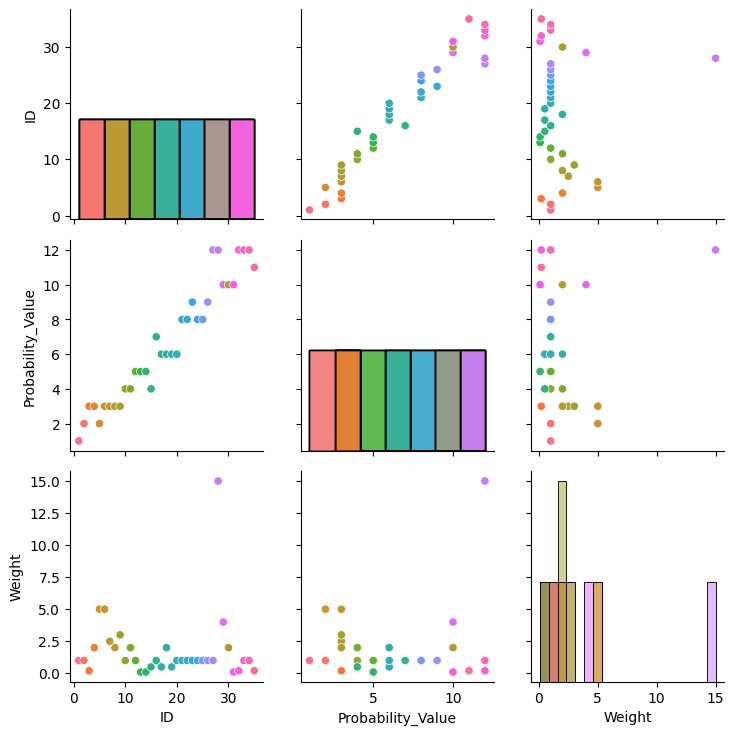

In [96]:
import seaborn as sns
g = sns.PairGrid(dataset,hue="Items")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [159]:
#dataset = dataset.drop(["Items","Potential_Criminal_Usage"],axis=1)
dataset.head(50)

,ID,Probability_Value,Weight
0,1,1,1.0
1,2,2,1.0
2,3,3,0.2
3,4,3,2.0
4,5,2,5.0
5,6,3,5.0
6,7,3,2.5
7,8,3,2.0
8,9,3,3.0
9,10,4,1.0


In [149]:
x = dataset[["Probability_Value","Weight"]]
y = dataset['ID']

In [150]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.        , 0.06040268],
       [0.09090909, 0.06040268],
       [0.18181818, 0.00671141],
       [0.18181818, 0.12751678],
       [0.09090909, 0.32885906],
       [0.18181818, 0.32885906],
       [0.18181818, 0.16107383],
       [0.18181818, 0.12751678],
       [0.18181818, 0.19463087],
       [0.27272727, 0.06040268],
       [0.27272727, 0.12751678],
       [0.36363636, 0.06040268],
       [0.36363636, 0.        ],
       [0.36363636, 0.        ],
       [0.27272727, 0.02684564],
       [0.54545455, 0.06040268],
       [0.45454545, 0.02684564],
       [0.45454545, 0.12751678],
       [0.45454545, 0.02684564],
       [0.45454545, 0.06040268],
       [0.63636364, 0.06040268],
       [0.63636364, 0.06040268],
       [0.72727273, 0.06040268],
       [0.63636364, 0.06040268],
       [0.63636364, 0.06040268],
       [0.72727273, 0.06040268],
       [1.        , 0.06040268],
       [1.        , 1.        ],
       [0.81818182, 0.26174497],
       [0.81818182, 0.12751678],
       [0.

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,random_state=0)
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,random_state=0)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
m1 = KNeighborsClassifier(n_neighbors = 3).fit(x_train,y_train)

acc1 = m1.score(x_test,y_test)
print(acc1)

0.0


In [155]:
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors = 3).fit(x_train_scaled,y_train)
acc1 = m2.score(x_test_scaled,y_test)
print(acc1)

0.0


In [161]:
#K terbaik
K = np.arange(2,30)
akurasi=[]
for k in K:
    m2 = KNeighborsClassifier(n_neighbors = k).fit(x_train_scaled,y_train)
    acc1 = m2.score(x_test_scaled,y_test)
    akurasi.append(acc1)
print(akurasi)

import matplotlib.pyplot as plt
plt.plot(K,akurasi)
plt.show()

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 26, n_neighbors = 27